In [280]:
import numpy as np
#%load_ext cudf.pandas
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
import random

In [281]:
f1 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\synthetic_cooling+38.csv')    #8 datasets for introducing faults into them
f2 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\synthetic_cooling+37.csv')
f3 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\synthetic_cooling+36.csv')
f4 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\synthetic_cooling+35.csv')
f5 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\synthetic_cooling+34.csv')
f6 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\synthetic_cooling+33.csv')
f7 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\synthetic_cooling+32.csv')
f8 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\synthetic_cooling+31.csv')
og = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\cooling_system.csv')

Making sure that the synthetic data meets the data ranges.

In [282]:
f1

,Unnamed: 0,65262-110,65263-111,64817-1598,example_id
0,0,89.626630,49.704887,4095.4954,0
1,1,89.606170,49.704270,4095.4841,0
2,2,89.605545,49.704266,4095.4836,0
3,3,89.605484,49.704266,4095.4836,0
4,4,89.605470,49.704266,4095.4836,0
...,...,...,...,...,...
92539,92539,89.233950,49.999897,4095.9812,1445
92540,92540,89.233950,49.999897,4095.9812,1445
92541,92541,89.233950,49.999897,4095.9812,1445
92542,92542,89.233950,49.999897,4095.9812,1445


In [283]:
dsets = [f1, f2, f3, f4, f5, f6, f7, f8]

In [285]:
dsets[0]

,65262-110,65263-111,64817-1598
0,89.626630,49.704887,4095.4954
1,89.606170,49.704270,4095.4841
2,89.605545,49.704266,4095.4836
3,89.605484,49.704266,4095.4836
4,89.605470,49.704266,4095.4836
...,...,...,...
92539,89.233950,49.999897,4095.9812
92540,89.233950,49.999897,4095.9812
92541,89.233950,49.999897,4095.9812
92542,89.233950,49.999897,4095.9812


Plotting some graphs to compare the synthetic data to the real data

In [290]:
#Function to plot moving average graph
def moving_avg(x, N=1000):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

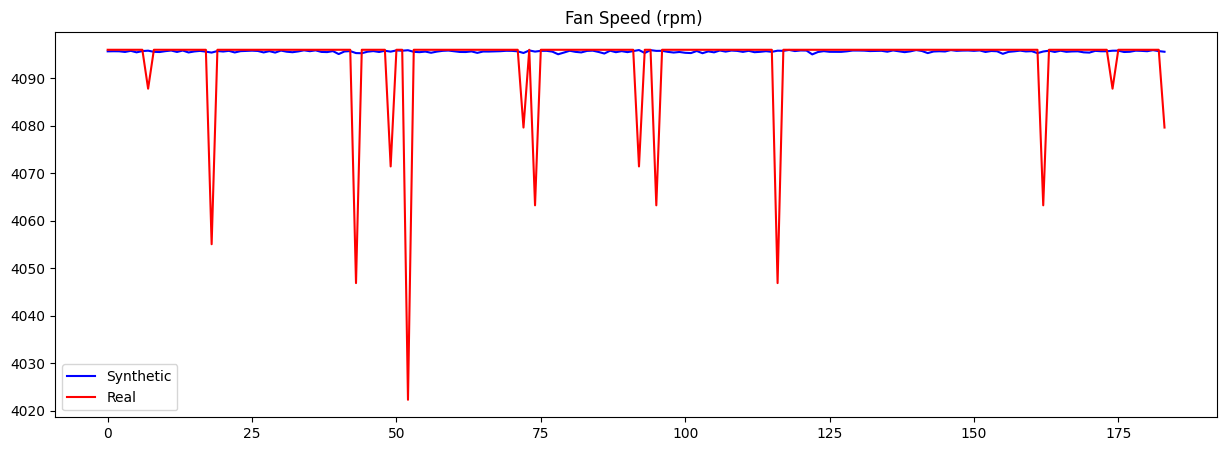

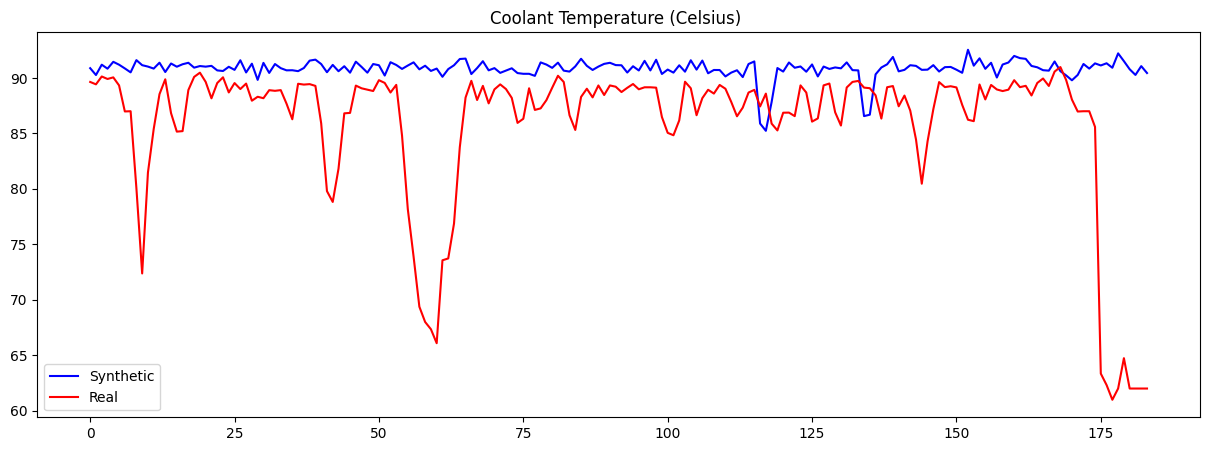

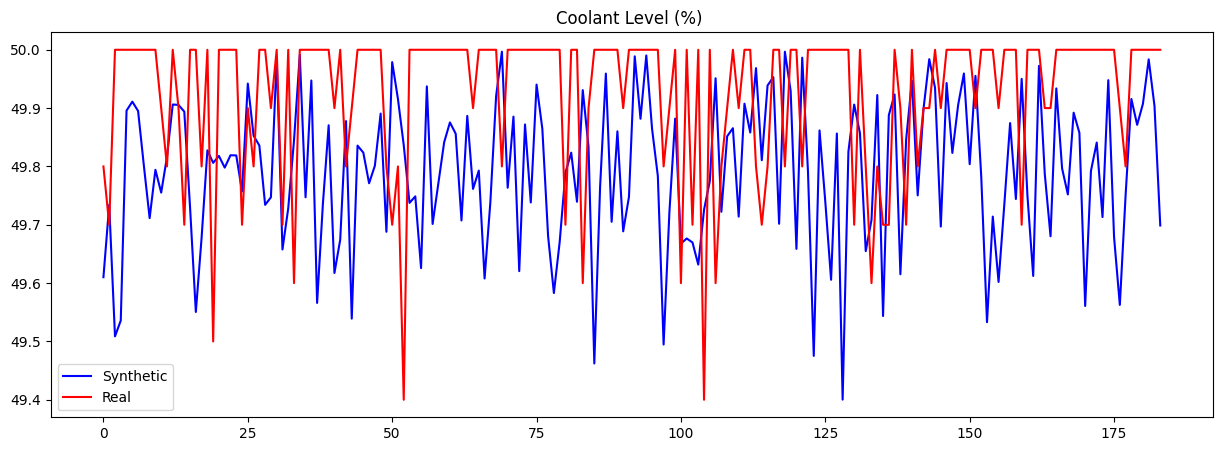

In [291]:
        w=500
        plt.figure(figsize=(15,5))
        v1 = dsets[4]['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
        v2 = og['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
        plt.title('Fan Speed (rpm) ')
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Real')
        plt.legend()
        plt.figure(figsize=(15,5))
        v1 = dsets[4]['65262-110'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
        v2 = og['65262-110'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
        plt.title('Coolant Temperature (Celsius) ')
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Real')
        plt.legend()
        plt.figure(figsize=(15,5))
        v1 = dsets[4]['65263-111'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
        v2 = og['65263-111'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
        plt.title('Coolant Level (%) ')
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Real')
        plt.legend()

In [314]:
len(og.loc[27669:41000])

13332

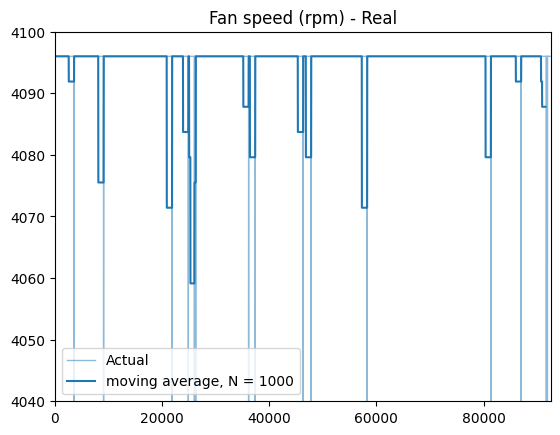

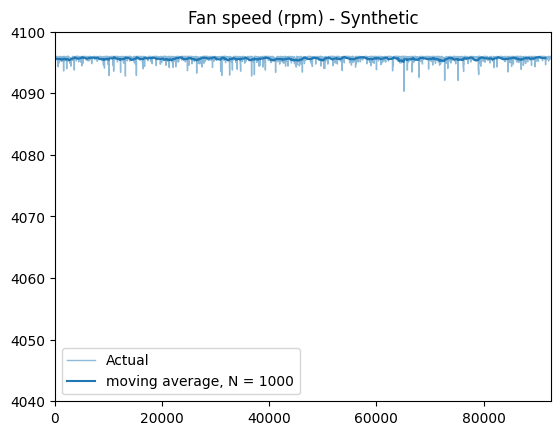

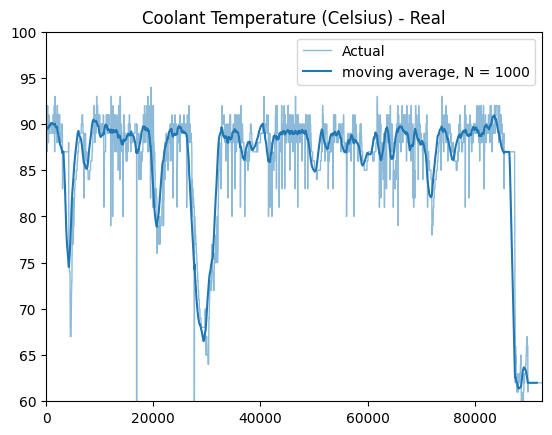

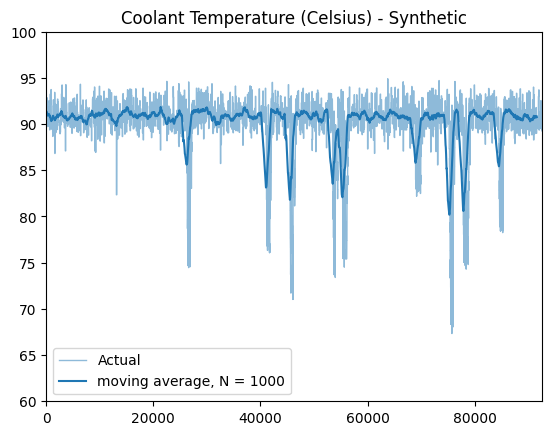

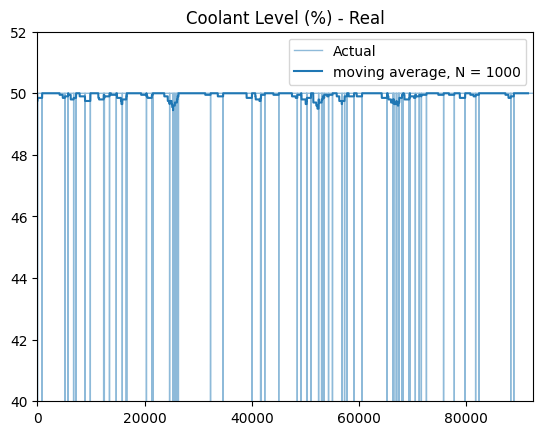

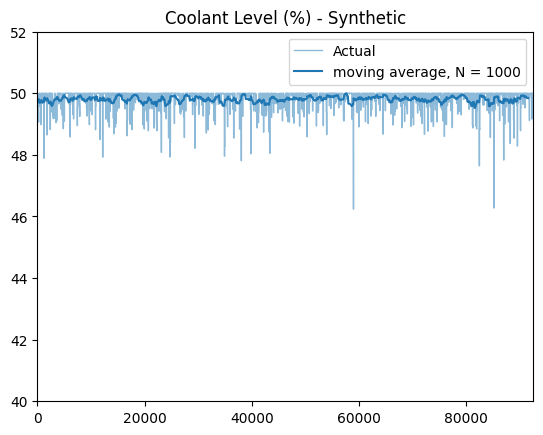

In [292]:

plt.plot(og['64817-1598'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(og['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(og['64817-1598']))
plt.ylim(4040, 4100)
plt.title('Fan speed (rpm) - Real')
plt.legend()
plt.show()
plt.plot(dsets[0]['64817-1598'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[0]['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[0]['64817-1598']))
plt.ylim(4040, 4100)
plt.title('Fan speed (rpm) - Synthetic')
plt.legend()
plt.show()
plt.plot(og['65262-110'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(og['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(og['65262-110']))
plt.ylim(60, 100)
plt.title('Coolant Temperature (Celsius) - Real')
plt.legend()
plt.show()
plt.plot(dsets[0]['65262-110'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[0]['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[0]['65262-110']))
plt.ylim(60, 100)
plt.title('Coolant Temperature (Celsius) - Synthetic')
plt.legend()
plt.show()
plt.plot(og['65263-111'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(og['65263-111'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(og['65263-111']))
plt.ylim(40, 52)
plt.title('Coolant Level (%) - Real')
plt.legend()
plt.show()
plt.plot(dsets[0]['65263-111'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[0]['65263-111'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[0]['65263-111']))
plt.ylim(40, 52)
plt.title('Coolant Level (%) - Synthetic')
plt.legend()
plt.show()

Below is the first type of fault introduced

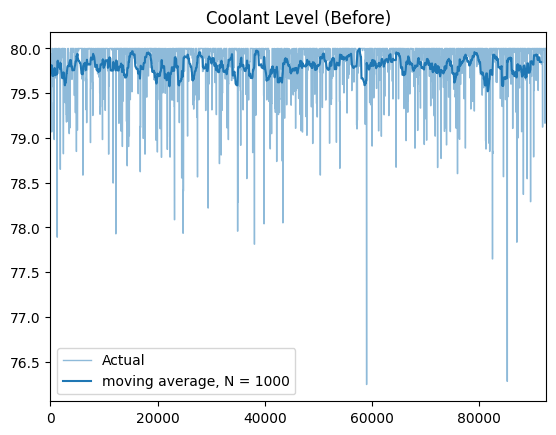

In [294]:
#Plotting the Coolant Level with faults
plt.plot(dsets[0]['65263-111'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[0]['65263-111'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[0]['65263-111']))
#plt.ylim(40, 52)
plt.title('Coolant Level (Before)')
plt.legend()
plt.show()

In [295]:
#Picking Dataset dsets[0] and f2
'''The first fault involves lowering the coolant level by 15% or so to indicate a potential leakage in the cooling system'''
valadd = 0.15/len(dsets[0])
val = 0
for index, row in dsets[0].iterrows():
    val += row[1] * valadd
    if(row[1] - val >= 30):
        row[1] -= val
valadd = 0.10/len(dsets[1])
val = 0
for index, row in dsets[1].iterrows():
    val += row[1] * valadd
    if(row[1] - val >= 30):
        row[1] -= val


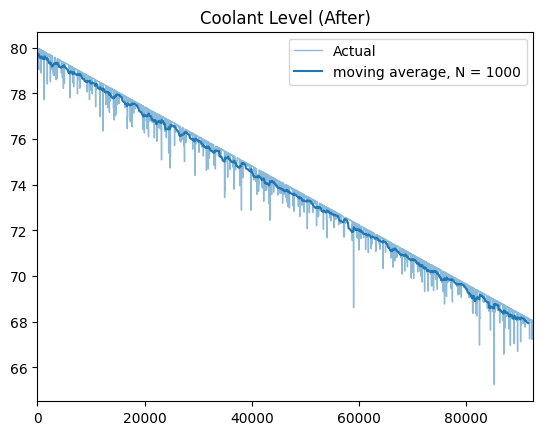

In [296]:
#Plotting the Coolant Level with faults
plt.plot(dsets[0]['65263-111'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[0]['65263-111'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[0]['65263-111']))
#plt.ylim(30, 52)
plt.title('Coolant Level (After)')
plt.legend()
plt.show()

Below is the second type of fault

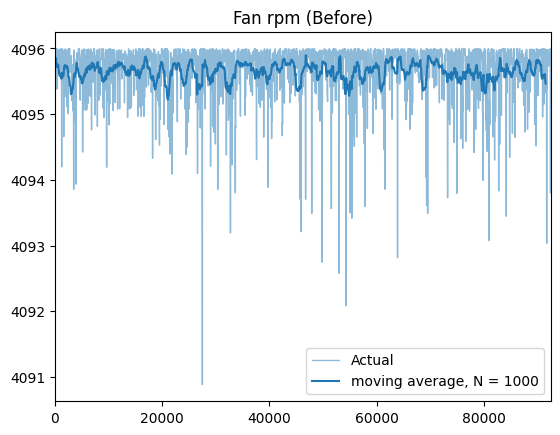

In [297]:
plt.plot(dsets[2]['64817-1598'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[2]['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[2]['64817-1598']))
#plt.ylim(30, 52)
plt.title('Fan rpm (Before)')
plt.legend()
plt.show()

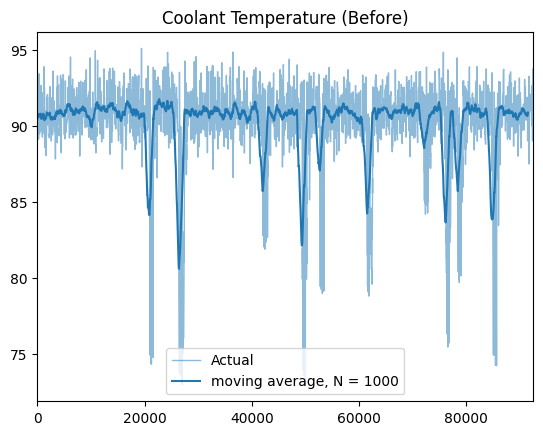

In [298]:
plt.plot(dsets[2]['65262-110'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[2]['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[2]['65262-110']))
#plt.ylim(30, 52)
plt.title('Coolant Temperature (Before)')
plt.legend()
plt.show()

In [299]:
#Picking Dataset f3 and f4
'''The second fault involves lowering the fan rpm by 30% or so and increasing the coolant temperature slightly to indicate a fan deterioration'''
valadd = 0.025/len(dsets[2])
val = 0
for index, row in dsets[2].iterrows():
    val += row[0] * valadd
    row[0] += val
    row[2] -= row[2] * 0.30
valadd = 0.035/len(dsets[3])
val = 0
for index, row in dsets[3].iterrows():
    val += row[0] * valadd
    row[0] += val
    row[2] -= row[2] * 0.35

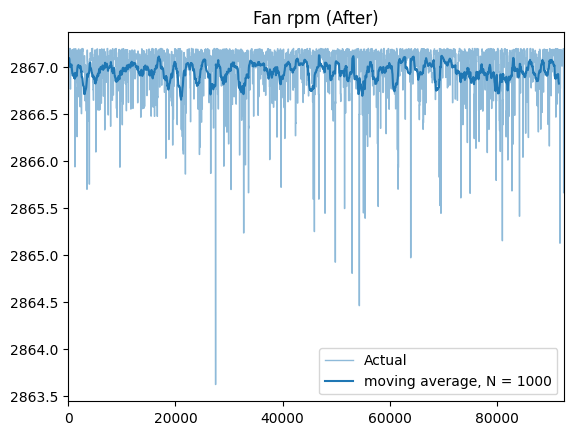

In [300]:
plt.plot(dsets[2]['64817-1598'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[2]['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[2]['64817-1598']))
#plt.ylim(30, 52)
plt.title('Fan rpm (After)')
plt.legend()
plt.show()

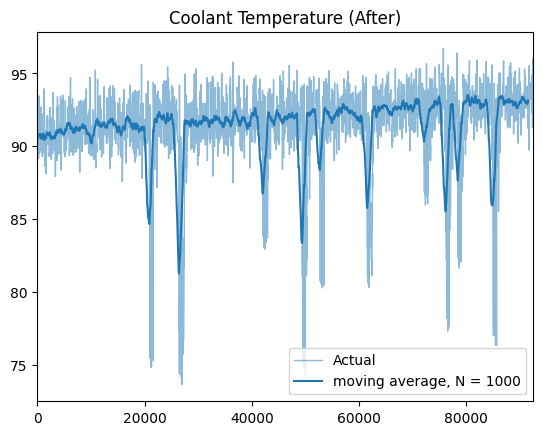

In [301]:
plt.plot(dsets[2]['65262-110'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[2]['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[2]['65262-110']))
#plt.ylim(30, 52)
plt.title('Coolant Temperature (After)')
plt.legend()
plt.show()

Below is the third fault

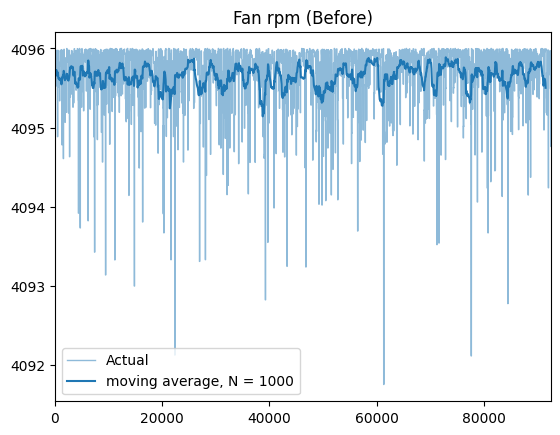

In [302]:
plt.plot(dsets[4]['64817-1598'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[4]['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[4]['64817-1598']))
#plt.ylim(30, 52)
plt.title('Fan rpm (Before)')
plt.legend()
plt.show()

In [303]:
#Picking Dataset f5 and f6
'''The second fault involves increasing the fan rpm by 15% or so to indicate a fan deterioration'''
for index, row in dsets[4].iterrows():
    row[2] += row[2] * 0.15
for index, row in dsets[5].iterrows():
    row[2] += row[2] * 0.10

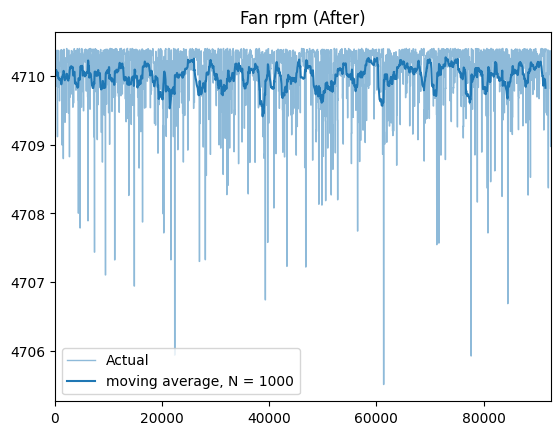

In [304]:
plt.plot(dsets[4]['64817-1598'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[4]['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[4]['64817-1598']))
#plt.ylim(30, 52)
plt.title('Fan rpm (After)')
plt.legend()
plt.show()

Below is the fourth type of fault introduced

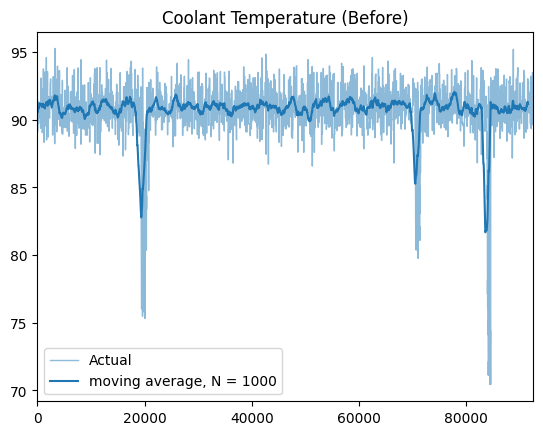

In [305]:
plt.plot(dsets[6]['65262-110'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[6]['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[6]['65262-110']))
#plt.ylim(30, 52)
plt.title('Coolant Temperature (Before)')
plt.legend()
plt.show()

In [306]:
#Picking Dataset f7 and f8
'''The fourth fault involves increasing the coolant temperature by 15% or so to indicate a cooling system issue'''
valadd = 0.15/len(dsets[6])
val = 0
for index, row in dsets[6].iterrows():
    val += row[0] * valadd
    row[0] += val
valadd = 0.10/len(dsets[7])
val = 0
for index, row in dsets[7].iterrows():
    val += row[0] * valadd
    row[0] += val

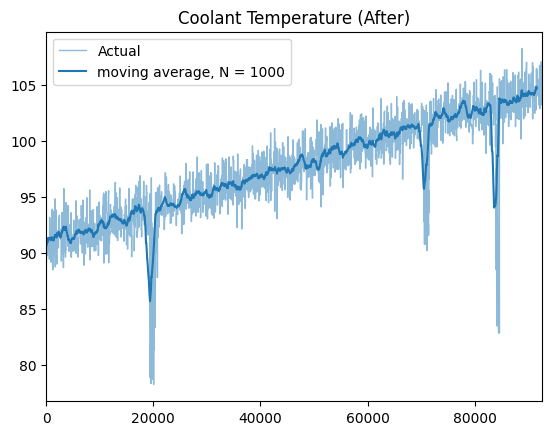

In [307]:
plt.plot(dsets[6]['65262-110'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(dsets[6]['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[6]['65262-110']))
#plt.ylim(30, 52)
plt.title('Coolant Temperature (After)')
plt.legend()
plt.show()

In [ ]:
path = r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\Final_cooling_sys_data'
for i in range(len(dsets)):         #Creating a list of all the datasets
    dsets[i].to_csv(path+'\\faulty_cooling_dset_'+str(i)+'.csv')
